# Capstone Project 1 — Analysis of NHANES Body Measurements

## Overview
This report analyzes body measurement data of adult males and females.  
We will use **NumPy, Matplotlib, Seaborn**, and **statistical analysis** to explore weight distributions, BMI, and ratios such as waist-to-height and waist-to-hip.

---

# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, pearsonr, spearmanr, zscore

---

# 2. Load the Datasets

**Explanation:**  
Download the male and female body measurement datasets from GitHub, and load them into Pandas DataFrames.


In [3]:
male_df = pd.read_csv('https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv',comment='#')
female_df = pd.read_csv('https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv',comment='#')
# there were some lines with '#' which were considered as data by pandas and thrown some error 
# thus to avoid such error, use comment = '#'

male = male_df.values #converted into numpy metrics
female = female_df.values

male.shape, female.shape

((4081, 7), (4221, 7))


---

# 3. Histograms of Weights

**Explanation:**  
Plot histograms for female weights (top) and male weights (bottom) with identical x-axis limits.

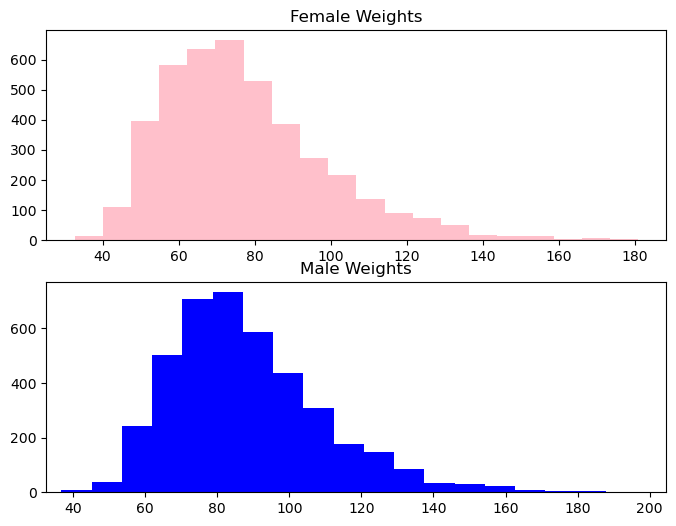

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))

ax1.hist(female[:,0], bins=20, color='pink')
ax1.set_title("Female Weights")

ax2.hist(male[:,0], bins=20, color='blue')
ax2.set_title("Male Weights")

plt.xlim([min(male[:,0].min(), female[:,0].min()),
          max(male[:,0].max(), female[:,0].max())])
plt.show()

In [5]:
male.shape , female.shape

((4081, 7), (4221, 7))


---

# 4. Boxplot: Male vs Female Weights

C:\Users\omc\AppData\Local\Temp\ipykernel_8292\2993334178.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female[:,0], male[:,0]], labels=['Female','Male'])


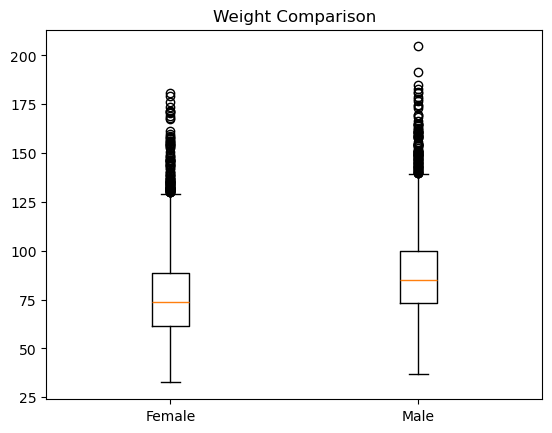

In [6]:
plt.boxplot([female[:,0], male[:,0]], labels=['Female','Male'])
plt.title("Weight Comparison")
plt.show()


---

# 5. Summary Statistics of Weights

In [7]:
def summary_stats(data, label):
    print(f"--- {label} ---")
    print("Mean:", np.mean(data))
    print("Median:", np.median(data))
    print("Std Dev:", np.std(data))
    print("Variance:", np.var(data))
    print("Skewness:", skew(data))
    print("Kurtosis:", kurtosis(data))

summary_stats(female[:,0], "Female Weights")
summary_stats(male[:,0], "Male Weights")

--- Female Weights ---
Mean: 77.40379057095475
Median: 73.6
Std Dev: 21.54250829019315
Variance: 464.07966343304065
Skewness: 1.03336107186799
Kurtosis: 1.4009683480659731
--- Male Weights ---
Mean: 88.36454300416565
Median: 85.0
Std Dev: 21.418936717962495
Variance: 458.770850128082
Skewness: 0.9842810741662347
Kurtosis: 1.4742884754078238


---
On average, males weigh more than females (88.36 vs. 77.40).

Both distributions are right skewed, meaning some individuals have higher-than-average weights pulling the tail to the right.

Variability is almost the same for both groups.



---

# 6. Adding BMI Column (Females Only)

In [8]:
female_bmi = female[:,0] / (female[:,1]/100)**2
female = np.column_stack([female, female_bmi])
female.shape # added bmi column as the columns are 8 

(4221, 8)


---

# 7. Standardise Female Dataset (z-scores)

In [9]:
zfemale= zscore(female , axis=0)
zfemale

array([[ 9.14295084e-01,  8.95037880e-03, -5.67394633e-01, ...,
         1.08316157e+00,  1.11578462e+00,  9.96967703e-01],
       [ 6.35775985e-01, -1.05306843e+00, -1.07893145e+00, ...,
         1.04475528e+00,  2.65088995e-01,  1.15617483e+00],
       [-2.04423297e-01,  1.50552886e-01,  5.83563204e-01, ...,
        -1.90646881e-01, -3.72932724e-01, -2.59275010e-01],
       ...,
       [-2.04423297e-01, -7.60111255e-02,  7.20263874e-02, ...,
        -2.93063641e-01,  4.66671455e-02, -1.86280603e-01],
       [ 5.55278621e-02,  1.18425119e+00,  8.81959680e-01, ...,
        -4.33886685e-01,  6.83598104e-04, -3.12019657e-01],
       [ 2.50491231e-01, -1.74692071e+00, -5.24766565e-01, ...,
         7.82312335e-01,  6.61697091e-01,  1.00581950e+00]])


---

# 8. Scatterplot Matrix + Correlations

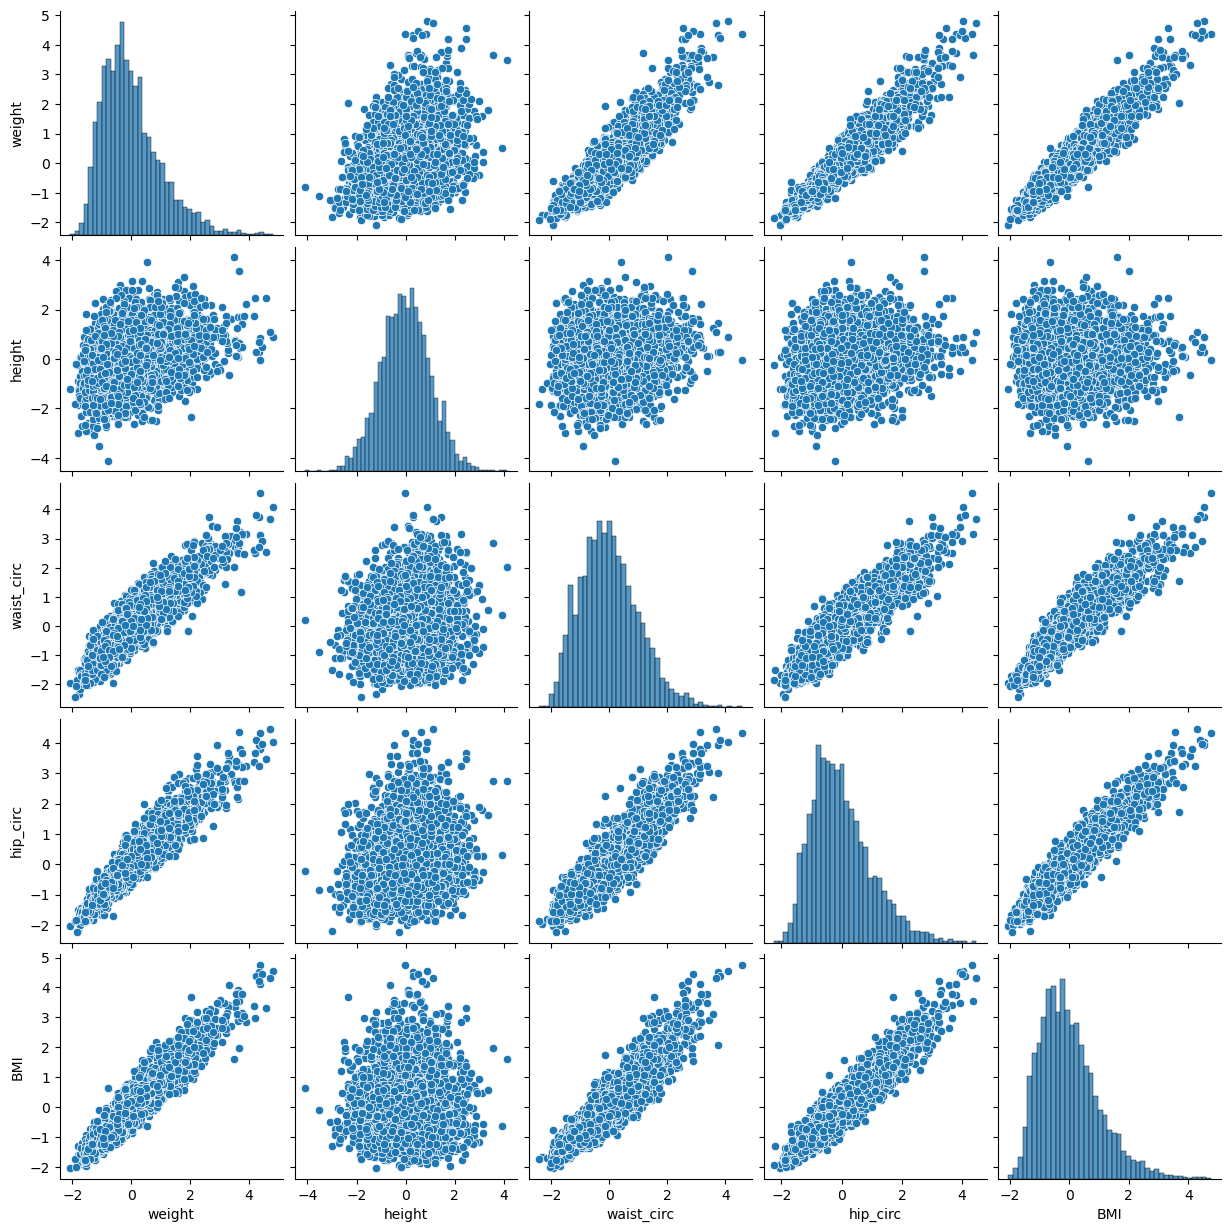

In [10]:
df_female = pd.DataFrame(zfemale, columns=['weight','height','upper_arm',
                                           'upper_leg','arm_circ','hip_circ',
                                           'waist_circ','BMI'])

sns.pairplot(df_female[['weight','height','waist_circ','hip_circ','BMI']])
plt.show()

# Correlations
pearson_corr = df_female.corr(method='pearson')
spearman_corr = df_female.corr(method='spearman')


---

# 9. Add Ratios: Waist/Height and Waist/Hip

In [11]:
# FEMALE
female_whr = female[:,6] / female[:,1]   # waist/height
female_whhip = female[:,6] / female[:,5] # waist/hip

# Add to matrix
female = np.column_stack([female, female_whr, female_whhip])

In [12]:
female.shape #added 2 cols to female distribution

(4221, 10)

In [13]:
#MALE
male_whr = male[:,6] / male[:,1]   # waist/height
male_whhip = male[:,6] / male[:,5] # waist/hip

# Add to matrix
male = np.column_stack([male, male_whr, male_whhip])
male.shape #added 2 cols to male distribution

(4081, 9)

---

# 10. Boxplot of Ratios

C:\Users\omc\AppData\Local\Temp\ipykernel_8292\2989906855.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_whr, male_whr, female_whhip, male_whhip],


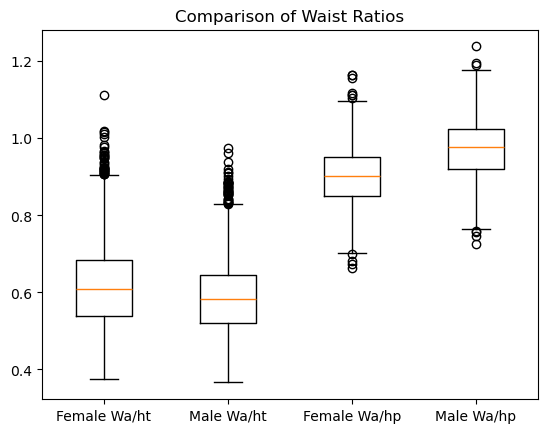

In [14]:
plt.boxplot([female_whr, male_whr, female_whhip, male_whhip],
labels=['Female Wa/ht','Male Wa/ht','Female Wa/hp','Male Wa/hp'])
plt.title("Comparison of Waist Ratios")
plt.show()

---
# 11. Discuss pros/cons of BMI,WHR,WHHIP

### BMI (BODY MASS INDEX): 
Simple, widely used, but does not capture fat distribution.

### WHR(WAIST TO HEIGHT):
Accounts for central obesity, predictive for heart risk.

### WHHIP(WAIST TO HIP):
Good for fat distribution, but harder to measure reliably.

---
# 12. Lowest & Highest BMI( 5 each)

In [15]:
bmi_sorted_idx = np.argsort(female[:,7])
lowest_idx = bmi_sorted_idx[:5]
highest_idx = bmi_sorted_idx[-5:]

print("Lowest BMI (standardized):\n", zfemale[lowest_idx])
print("Highest BMI (standardized):\n", zfemale[highest_idx])

Lowest BMI (standardized):
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]
Highest BMI (standardized):
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.0558578

---
# CONCLUSION :
Through quantitative and visual analysis, this project highlighted gender differences in body measurements among adults, the importance of using multiple metrics for health assessment, and the value of standardizing and visualizing data for clearer interpretation. These insights contribute to a more nuanced understanding of population health and provide a foundation for more comprehensive health risk assessment beyond BMI alone.

## Converting the observations into table

In [16]:

# Lowest BMI (from your output)
lowest_bmi = [-1.9747611, -2.0445496, -1.9596575, -2.4443567, -1.8549122]

# Highest BMI (from your output)
highest_bmi = [4.4274208, 3.98717328, 4.2993665, 4.4601522, 3.9329599]

# Create DataFrames
df_lowest = pd.DataFrame({"Rank": range(1, 6), "Lowest BMI (Standardized)": lowest_bmi})
df_highest = pd.DataFrame({"Rank": range(1, 6), "Highest BMI (Standardized)": highest_bmi})

# Display
print("Lowest BMI (Standardized) – Female")
display(df_lowest)

print("\nHighest BMI (Standardized) – Female")
display(df_highest)

Lowest BMI (Standardized) – Female


,Rank,Lowest BMI (Standardized)
0,1,-1.974761
1,2,-2.044550
2,3,-1.959658
3,4,-2.444357
4,5,-1.854912



Highest BMI (Standardized) – Female


,Rank,Highest BMI (Standardized)
0,1,4.427421
1,2,3.987173
2,3,4.299366
3,4,4.460152
4,5,3.932960
